In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib

In [30]:

df = pd.read_csv("/content/news.csv")

X = df['text']
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8453038674033149
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.98      0.71      0.82       628
        REAL       0.77      0.98      0.87       639

    accuracy                           0.85      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.85      0.84      1267



In [31]:
import pandas as pd
print("First few rows of the DataFrame:")
print(df.head())

print("\nShape of the DataFrame:")
print(df.shape)

print("\nInformation about the DataFrame:")
print(df.info())


First few rows of the DataFrame:
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  

Shape of the DataFrame:
(6335, 4)

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      

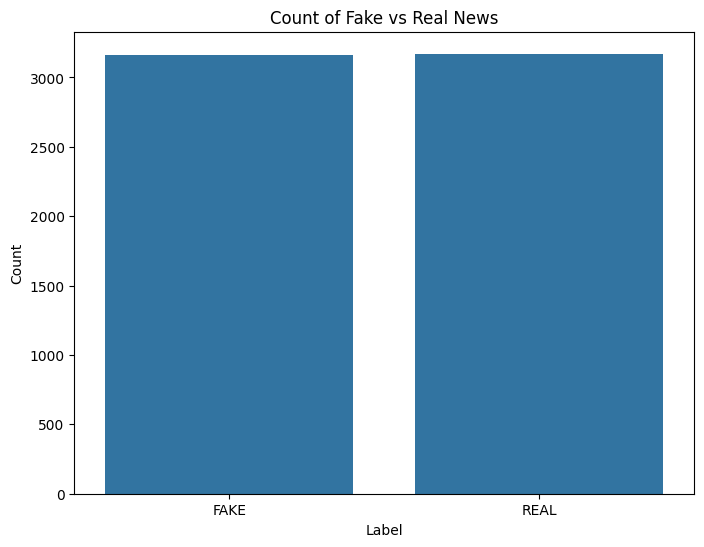

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Count of Fake vs Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()




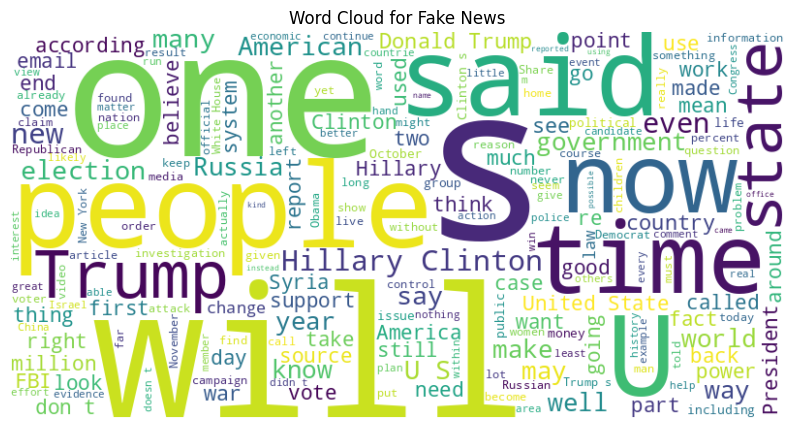

In [33]:
from wordcloud import WordCloud
fake_text = " ".join(df[df['label'] == 'FAKE']['text'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(fake_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()




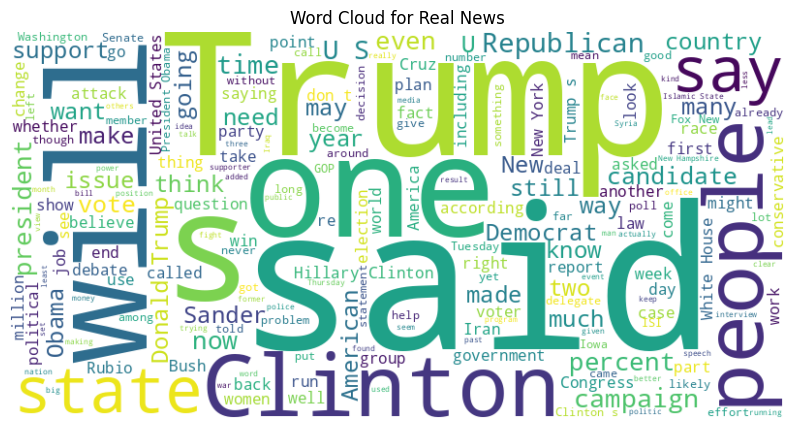

In [34]:
real_text = " ".join(df[df['label'] == 'REAL']['text'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(real_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()

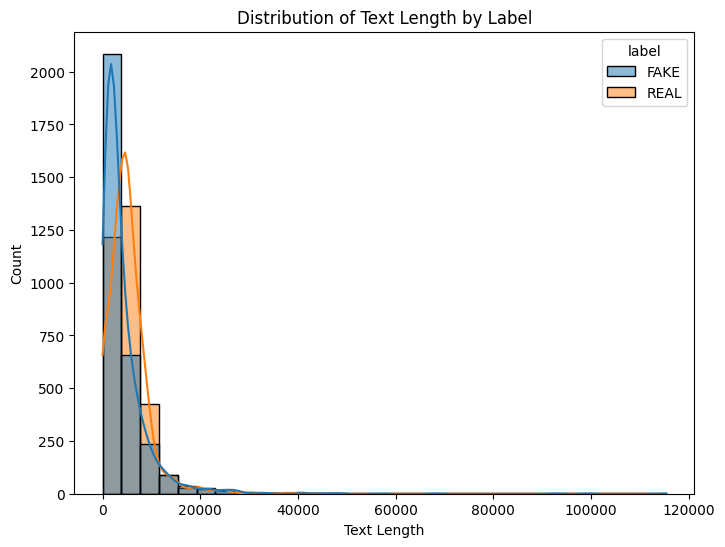

In [35]:
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

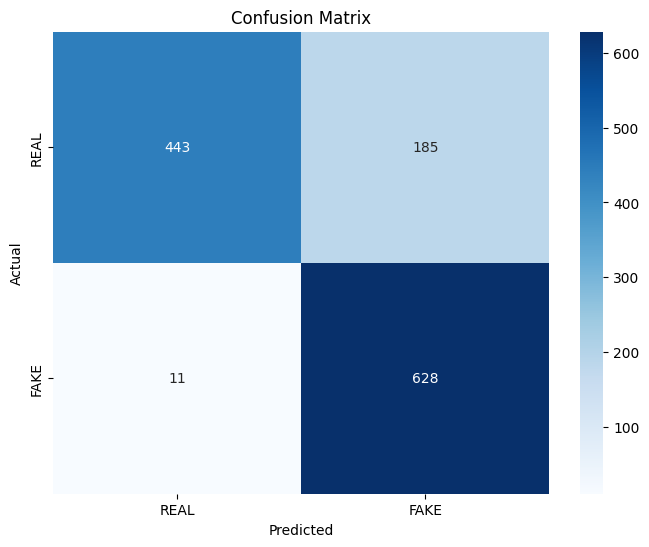

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [37]:
joblib.dump(nb_classifier, 'fake_news_classifier_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [38]:


# Load the trained model
model = joblib.load('fake_news_classifier_model.pkl')

# Load the TF-IDF vectorizer
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to classify a given text as real or fake news
def classify_news(text):
    # Preprocess the text
    text_vectorized = vectorizer.transform([text])
    # Predict the label
    prediction = model.predict(text_vectorized)
    if prediction[0] == 'REAL':
        return "This news is real."
    else:
        return "This news is fake."

# Test the function with a sample text
sample_text = "Unlike in most other states, Republicans in Colorado scrapped plans for a more traditional primary or caucus to award its delegates to this summerâ€™s national convention in Cleveland. Instead, the state GOP selected three delegates from each of the stateâ€™s seven congressional districts at individual contests in the days leading up to the state convention, and then the remaining 13 delegates at the statewide event this past weekend. It was a rather convoluted process that favored campaigns that understood the rules and that had the ground game necessary to take advantage of themâ€”or, put another way, not the Trump campaign."
print(classify_news(sample_text))

sample_text = "Hillary Clinton found guilty of corruption."
print(classify_news(sample_text))


This news is real.
This news is fake.
